<a href="https://colab.research.google.com/github/alsantosad/PROJECT-ROCKET/blob/backstage/M4TRABALHO_EM_GRUPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***TRABALHO EM GRUPO***

##***CONTEXTO***
Você e a sua equipe foram escalados pela Agência Nacional de Petróleo e Gás
Natural e Biocombustíveis (ANP) para realizar uma análise exploratória
relacionada à série histórica de preço de venda da gasolina e do etanol.

A ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural no Brasil, que mantém o Banco de Dados de Exploração e
Produção (BDEP); divulga as estatísticas oficiais sobre reservas, refino e produção
de petróleo, gás e biocombustíveis no Brasil;
realiza e divulga pesquisas sobre
qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços
desses produtos; promove estudos sobre o potencial petrolífero e o
desenvolvimento do setor; entre outras atividades

Realizar a análise exploratória a partir das fontes de dados
disponíveis no portal gov.br.

Serão utilizados os arquivos
dos dois últimos meses do ano atual (Etanol Hidratado +
Gasolina C) contendo a série histórica dos preços da
gasolina e do etanol em todo o Brasil.


A análise deve responder às seguintes perguntas:
1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do
etanol e da gasolina tiveram uma tendência de queda ou aumento?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
Além disso, vocês deverão pensar em mais três perguntas que deverão ser respondidas por scripts.

##***Importando Bibliotecas***

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##***Analise Exploratória***

###***Leitura dos Datasets***

In [59]:
#Lendo os csv pelo link do site

# Primeiro arquivo referente ao mês 11
url1 = 'https://raw.githubusercontent.com/alsantosad/PROJECT-ROCKET/master/DADOS/precos-gasolina-etanol-11.csv'
df1 = pd.read_csv(url1,sep=';')

# Segundo arquivo referente ao mês 12
url2 = 'https://raw.githubusercontent.com/alsantosad/PROJECT-ROCKET/master/DADOS/precos-gasolina-etanol-12.csv'
df2 = pd.read_csv(url2,sep=';')

###***Visualizando os Datasets Separados***

In [60]:
#Visualizando os dados do data set
df1.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA


In [61]:
#Visualizando os dados do data set
df2.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,MA,SANTA INES,POSTO MAGNOLIA LTDA,35.123.447/0001-32,AVENIDA MARECHAL CASTELO BRANCO,3707,NaN,CENTRO,65300-001,GASOLINA,01/12/2023,"5,59",NaN,R$ / litro,BRANCA
1,NE,MA,SANTA INES,POSTO MAGNOLIA LTDA,35.123.447/0001-32,AVENIDA MARECHAL CASTELO BRANCO,3707,NaN,CENTRO,65300-001,GASOLINA ADITIVADA,01/12/2023,"5,74",NaN,R$ / litro,BRANCA


In [62]:
#Visualizando numero de linhas e colunas dos 2 Datasets
print(df1.shape,df2.shape)

(52543, 16) (49453, 16)


###***Juntando os Datasets com a Função (`concat()`)***

In [63]:
#Datasets juntos `df1, df2` e ignorando o index para melhor organização do Dataset
#Ignore index ajuda não dar erro
df = pd.concat([df1, df2],ignore_index=True)
df.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA


##***Limpeza dos Dados que vamos Trabalhar***

###***Visualizando as valores da coluna de varias formas***

In [64]:
#Visualizando as informações da coluna "Valor de Compra"
df['Valor de Compra'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101996 entries, 0 to 101995
Series name: Valor de Compra
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 797.0 KB


In [65]:
# Visualizando a descrição
df['Valor de Compra'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
101991   NaN
101992   NaN
101993   NaN
101994   NaN
101995   NaN
Name: Valor de Compra, Length: 101996, dtype: float64>

In [66]:
# Visualizando os tipos de valores
df['Valor de Compra'].value_counts

<bound method IndexOpsMixin.value_counts of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
101991   NaN
101992   NaN
101993   NaN
101994   NaN
101995   NaN
Name: Valor de Compra, Length: 101996, dtype: float64>

In [67]:
#Visualizando os Tipos unicos de Valores na coluna
#Interessante, a função (.unique()) retorna um array
#A função (.unique) sem parentese retorna uma serie
#Diferentes metodos de visualização
df['Valor de Compra'].unique()

array([nan])

###***Corrigindo valores das colunas***

In [68]:
# Corrigindo valores em "Valor de Venda". Substituindo as (,)virgulas por (.)ponto.
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float)

In [69]:
# Formatando a coluna Data da Coleta de str para DATE utilizando a função TO_DATETIME
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')
df

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,2023-11-01,6.30,NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,2023-11-01,6.30,NaN,R$ / litro,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,ETANOL,2023-11-01,4.88,NaN,R$ / litro,VIBRA
3,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA,2023-11-01,6.19,NaN,R$ / litro,VIBRA
4,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA ADITIVADA,2023-11-01,6.29,NaN,R$ / litro,VIBRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101991,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,GASOLINA,2023-12-29,5.79,NaN,R$ / litro,IPIRANGA
101992,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,ETANOL,2023-12-29,3.79,NaN,R$ / litro,IPIRANGA
101993,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA,2023-12-29,5.49,NaN,R$ / litro,RODOIL
101994,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA ADITIVADA,2023-12-29,5.59,NaN,R$ / litro,RODOIL


###***Limpeza dos Dados, Removendo colunas indesejadas***

In [70]:
#Removendo colunas que não serão uteis.
dfproc = df.drop(columns=['Valor de Compra','Nome da Rua','Numero Rua','Complemento','Cep','CNPJ da Revenda','Revenda'])
dfproc.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA,2023-11-01,6.3,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA ADITIVADA,2023-11-01,6.3,R$ / litro,VIBRA


In [71]:
#Visualizando as informações da coluna, pois vamos trabalhar com ela.
dfproc['Valor de Venda'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101996 entries, 0 to 101995
Series name: Valor de Venda
Non-Null Count   Dtype  
--------------   -----  
101996 non-null  float64
dtypes: float64(1)
memory usage: 797.0 KB


##***1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?***

In [72]:
#Verificando se o média do Valor do Etanol está de acordo com o gráfico mostrado
dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 2         4.88
5         4.85
10        4.89
13        4.19
16        4.17
          ... 
101984    3.19
101987    4.19
101990    4.27
101992    3.79
101995    3.99
Name: Valor de Venda, Length: 32912, dtype: float64>

In [73]:
#Achando o Minimo e o Maximo do Valor de Venda do ETANOL
maior_valor_etanol = dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].max()
menor_valor_etanol = dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].min()
display(f'O maior valor do Etanol é {maior_valor_etanol}')
display(f'O menor valor do Etanol é {menor_valor_etanol}')

'O maior valor do Etanol é 6.6'

'O menor valor do Etanol é 2.69'

In [74]:
#Buscando o maior valor de Venda do Etanol (Verificando Outlier)
maior_valor_etanol = dfproc[(dfproc['Produto'] == 'ETANOL') & (dfproc['Valor de Venda'] == 6.6)]
maior_valor_etanol.head(4)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
8621,N,PA,SANTAREM,PRAINHA,ETANOL,2023-11-07,6.6,R$ / litro,SABBÁ
8624,N,PA,SANTAREM,FATIMA,ETANOL,2023-11-07,6.6,R$ / litro,SABBÁ
8629,N,PA,SANTAREM,AEROPORTO VELHO,ETANOL,2023-11-07,6.6,R$ / litro,SABBÁ
17645,N,PA,SANTAREM,PRAINHA,ETANOL,2023-11-13,6.6,R$ / litro,SABBÁ


In [75]:
# Supondo que 'dados' é o DataFrame que contém seus dados
media_etanol = dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].mean()

print(f'Média do valor de venda do Etanol: {media_etanol}')


Média do valor de venda do Etanol: 3.8141756806028195


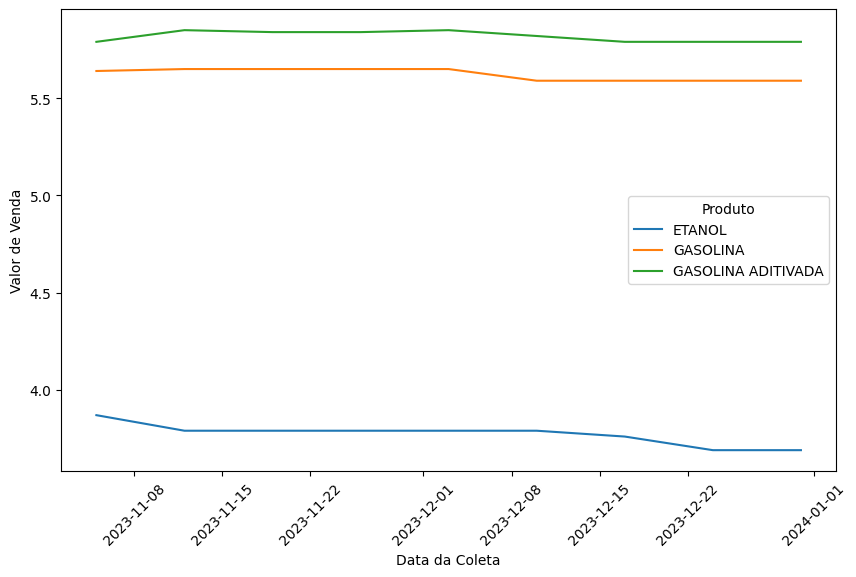

In [76]:
# Agrupando por semana e tipo de combustível, e calculando a média dos preços de venda
comport = dfproc.groupby([pd.Grouper(key='Data da Coleta', freq='W'), 'Produto'])['Valor de Venda'].median().reset_index()
#Plotando o gráfico de linha
fig, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45)
sns.lineplot(data=comport, x='Data da Coleta', y='Valor de Venda', hue='Produto', ax=ax)
plt.show()


In [77]:
comport = dfproc.groupby([pd.Grouper(key='Data da Coleta', freq='W'), 'Produto'])['Valor de Venda'].median()
comport

Data da Coleta  Produto           
2023-11-05      ETANOL                3.87
                GASOLINA              5.64
                GASOLINA ADITIVADA    5.79
2023-11-12      ETANOL                3.79
                GASOLINA              5.65
                GASOLINA ADITIVADA    5.85
2023-11-19      ETANOL                3.79
                GASOLINA              5.65
                GASOLINA ADITIVADA    5.84
2023-11-26      ETANOL                3.79
                GASOLINA              5.65
                GASOLINA ADITIVADA    5.84
2023-12-03      ETANOL                3.79
                GASOLINA              5.65
                GASOLINA ADITIVADA    5.85
2023-12-10      ETANOL                3.79
                GASOLINA              5.59
                GASOLINA ADITIVADA    5.82
2023-12-17      ETANOL                3.76
                GASOLINA              5.59
                GASOLINA ADITIVADA    5.79
2023-12-24      ETANOL                3.69
                GAS

In [78]:
dfproc.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA,2023-11-01,6.3,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA ADITIVADA,2023-11-01,6.3,R$ / litro,VIBRA


##***2. Qual o preço médio da gasolina e do etanol nesses dois meses?***

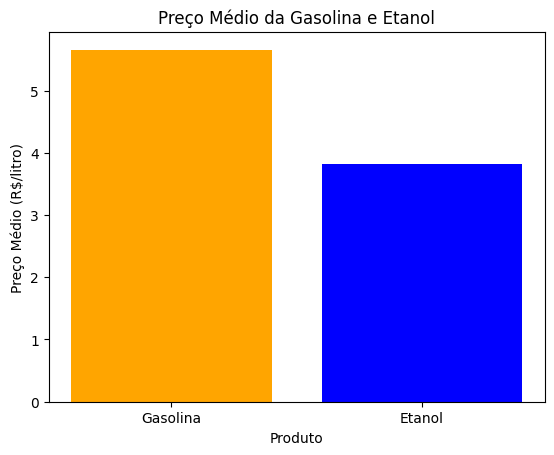

In [79]:
# Filtrar apenas as linhas relacionadas à gasolina
gasolina_df = dfproc[dfproc['Produto'] == 'GASOLINA']

# Filtrar apenas as linhas relacionadas ao etanol
etanol_df = dfproc[dfproc['Produto'] == 'ETANOL']

# Calcular o preço médio da gasolina
preco_medio_gasolina = gasolina_df['Valor de Venda'].mean()

# Calcular o preço médio do etanol
preco_medio_etanol = etanol_df['Valor de Venda'].mean()

# Dados para o gráfico
produtos = ['Gasolina', 'Etanol']
precos_medios = [preco_medio_gasolina, preco_medio_etanol]

# Criar o gráfico de barras
plt.bar(produtos, precos_medios, color=['orange', 'blue'])

# Adicionar rótulos e título ao gráfico
plt.xlabel('Produto')
plt.ylabel('Preço Médio (R$/litro)')
plt.title('Preço Médio da Gasolina e Etanol')

# Mostrar o gráfico
plt.show()


##***3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?***

In [80]:
dfproc.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA,2023-11-01,6.30,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA ADITIVADA,2023-11-01,6.30,R$ / litro,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,ETANOL,2023-11-01,4.88,R$ / litro,VIBRA


In [81]:
# Filtra apenas as linhas relacionadas à gasolina
gasolina_df = dfproc[dfproc['Produto'] == 'GASOLINA']

# Filtra apenas as linhas relacionadas ao etanol
etanol_df = dfproc[dfproc['Produto'] == 'ETANOL']

# Calcula o preço médio da gasolina para cada estado
media_gasolina_por_estado = gasolina_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Calcula o preço médio do etanol para cada estado
media_etanol_por_estado = etanol_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Obtém os 5 estados com os preços médios mais altos para a gasolina
top5_gasolina = media_gasolina_por_estado.nlargest(5)

# Obtém os 5 estados com os preços médios mais altos para o etanol
top5_etanol = media_etanol_por_estado.nlargest(5)

# Exibe os resultados
print('Top 5 Estados com Preço Médio mais Alto para Gasolina:')
print(top5_gasolina)

print('\nTop 5 Estados com Preço Médio mais Alto para Etanol:')
print(top5_etanol)


Top 5 Estados com Preço Médio mais Alto para Gasolina:
Estado - Sigla
AC    6.894907
AM    6.601109
RO    6.439335
PA    6.001357
RR    5.892336
Name: Valor de Venda, dtype: float64

Top 5 Estados com Preço Médio mais Alto para Etanol:
Estado - Sigla
AP    5.397500
RO    5.088654
RR    4.872857
AC    4.808250
PA    4.606010
Name: Valor de Venda, dtype: float64


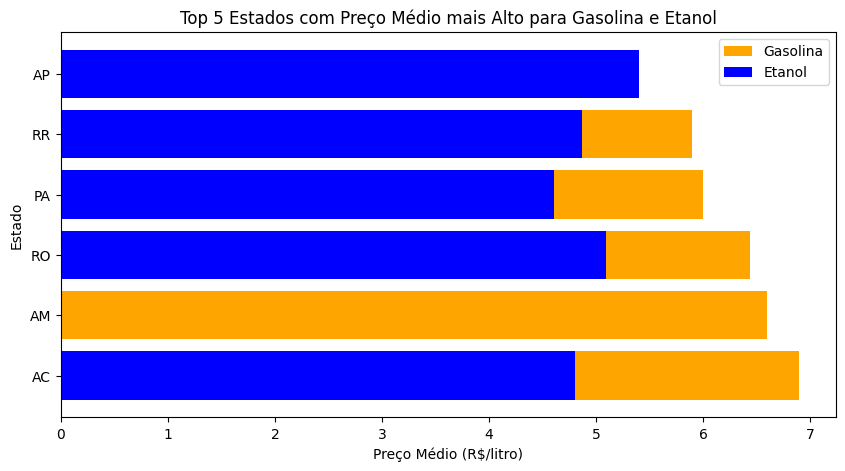

In [82]:
# Configuração do gráfico de barras para a gasolina
plt.figure(figsize=(10, 5))
plt.barh(top5_gasolina.index, top5_gasolina, color='orange', label='Gasolina')

# Configuração do gráfico de barras para o etanol
plt.barh(top5_etanol.index, top5_etanol, color='blue', label='Etanol')

# Adiciona rótulos e título ao gráfico
plt.xlabel('Preço Médio (R$/litro)')
plt.ylabel('Estado')
plt.title('Top 5 Estados com Preço Médio mais Alto para Gasolina e Etanol')
plt.legend()

# Mostra o gráfico
plt.show()


##***4. Qual o preço médio da gasolina e do etanol por estado?***

In [83]:
# Filtra apenas as linhas relacionadas à gasolina
gasolina_df = dfproc[dfproc['Produto'] == 'GASOLINA']

# Filtra apenas as linhas relacionadas ao etanol
etanol_df = dfproc[dfproc['Produto'] == 'ETANOL']

# Calcula o preço médio da gasolina para cada estado
media_gasolina_por_estado = gasolina_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Calcula o preço médio do etanol para cada estado
media_etanol_por_estado = etanol_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

print(f'A média do Preço da Gasolina por Estado é {media_gasolina_por_estado}')
print(f'A média do Preço do Etanol por Estado é {media_etanol_por_estado}')

A média do Preço da Gasolina por Estado é Estado - Sigla
AC    6.894907
AL    5.868059
AM    6.601109
AP    5.568994
BA    5.888282
CE    5.795289
DF    5.532317
ES    5.764608
GO    5.532579
MA    5.512465
MG    5.539809
MS    5.709834
MT    5.649198
PA    6.001357
PB    5.584381
PE    5.472004
PI    5.386226
PR    5.746458
RJ    5.695776
RN    5.696989
RO    6.439335
RR    5.892336
RS    5.605301
SC    5.734883
SE    5.655691
SP    5.522834
TO    5.841281
Name: Valor de Venda, dtype: float64
A média do Preço do Etanol por Estado é Estado - Sigla
AC    4.808250
AL    4.306241
AM    4.551735
AP    5.397500
BA    4.238109
CE    4.528349
DF    3.600460
ES    4.138996
GO    3.503608
MA    4.424092
MG    3.553628
MS    3.648490
MT    3.170450
PA    4.606010
PB    3.980656
PE    3.997808
PI    4.077849
PR    3.761886
RJ    4.102228
RN    4.441496
RO    5.088654
RR    4.872857
RS    4.596458
SC    4.343896
SE    4.381404
SP    3.412366
TO    4.247546
Name: Valor de Venda, dtype: float64


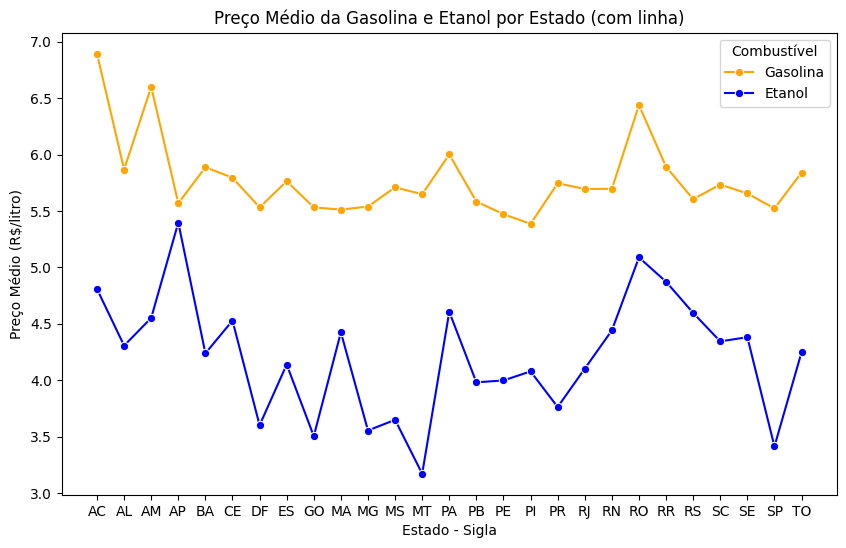

In [84]:
# Juntando os dataframes para facilitar a visualização
df = pd.DataFrame({'Gasolina': media_gasolina_por_estado, 'Etanol': media_etanol_por_estado}).reset_index()

# Criando o gráfico de linhas usando seaborn com cores personalizadas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.melt('Estado - Sigla', var_name='Combustível', value_name='Preço Médio (R$/litro)'),
             x='Estado - Sigla', y='Preço Médio (R$/litro)', hue='Combustível', marker='o', palette={'Gasolina': 'orange', 'Etanol': 'blue'})
plt.title('Preço Médio da Gasolina e Etanol por Estado (com linha)')
plt.xlabel('Estado - Sigla')
plt.ylabel('Preço Médio (R$/litro)')

plt.show()

##***5. Qual o município que possui o menor preço para a gasolina e para o etanol?***

In [85]:
# Calcula o preço minimo da gasolina para cada estado
min_gasolina_por_municipio = gasolina_df.groupby('Municipio')['Valor de Venda'].min()
municipio_menor_gasolina = min_gasolina_por_municipio.sort_values().head(1)
df_municipio_menor_gasolina = pd.DataFrame(municipio_menor_gasolina)
df_municipio_menor_gasolina

,Valor de Venda
Municipio,
SAO CARLOS,4.49


In [86]:
# Calcula o preço minimo do etanol para cada municipio
min_etanol_por_municipio = etanol_df.groupby('Municipio')['Valor de Venda'].min()
municipio_menor_etanol = min_etanol_por_municipio.sort_values().head(1)
df_municipio_menor_etanol = pd.DataFrame(municipio_menor_etanol)
df_municipio_menor_etanol

,Valor de Venda
Municipio,
SAO PAULO,2.69


##***6. Qual o município que possui o maior preço para a gasolina e para o etanol?***


In [87]:
# Calcula o preço maximo da gasolina para cada municipio
max_gasolina_por_municipio = gasolina_df.groupby('Municipio')['Valor de Venda'].max()
municipio_max_gasolina = max_gasolina_por_municipio.sort_values().head(1)
df_municipio_max_gasolina = pd.DataFrame(municipio_max_gasolina)
df_municipio_max_gasolina

,Valor de Venda
Municipio,
SAO JOSE DE RIBAMAR,5.09


In [88]:
# Calcula o preço maximo do etanol para cada estado
max_etanol_por_municipio = etanol_df.groupby('Municipio')['Valor de Venda'].max()
municipio_max_etanol = max_etanol_por_municipio.sort_values().head(1)
df_municipio_max_etanol=pd.DataFrame(municipio_max_etanol)
df_municipio_max_etanol

,Valor de Venda
Municipio,
TRINDADE,3.09


##***7. Qual a região que possui o maior valor médio da gasolina?***

In [89]:
media_gasolina_por_regiao = gasolina_df.groupby("Regiao - Sigla")['Valor de Venda'].mean()

regiao_maior_media_gasolina = media_gasolina_por_regiao.idxmax()
valor_maior_media_gasolina = media_gasolina_por_regiao.max()

print(f'A região com o maior valor médio de gasolina é {regiao_maior_media_gasolina} com média de {valor_maior_media_gasolina:.2f} R$/litro.')

regioes_ordenadas = media_gasolina_por_regiao.sort_values(ascending=False)

df_regiao_max_gasolina = pd.DataFrame(regioes_ordenadas)
df_regiao_max_gasolina

A região com o maior valor médio de gasolina é N com média de 6.17 R$/litro.


,Valor de Venda
Regiao - Sigla,
N,6.171947
S,5.687915
NE,5.686899
CO,5.580768
SE,5.564621


##***8.Qual a região que possui o menor valor médio do etanol?***

In [90]:
media_etanol_por_regiao = etanol_df.groupby("Regiao - Sigla")['Valor de Venda'].mean()

regiao_maior_media_etanol = media_etanol_por_regiao.idxmax()
valor_maior_media_etanol = media_etanol_por_regiao.max()

print(f'A região com o maior valor médio de Etanol é {regiao_maior_media_etanol} com média de {valor_maior_media_etanol:.2f} R$/litro.')

regioes_ordenadas = media_etanol_por_regiao.sort_values(ascending=False)

df_regiao_media_etanol = pd.DataFrame(regioes_ordenadas)
df_regiao_media_etanol

A região com o maior valor médio de Etanol é N com média de 4.58 R$/litro.


,Valor de Venda
Regiao - Sigla,
N,4.584460
NE,4.249076
S,4.078209
SE,3.572342
CO,3.479649


##***9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?***

##***10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?***

##***11. Qual a distribuição de bandeiras por região do país?***


##***12. Existe alguma relação entre a data do mês em que determinadas bandeiras são mais lucrativas?***

##***13. Existe alguma bandeira exclusiva de alguns estados?***

In [91]:
# Para cada estado, percorrer lista de bandeira e arquivar e em dataframe
